(3, 3)
[0. 0. 0.]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


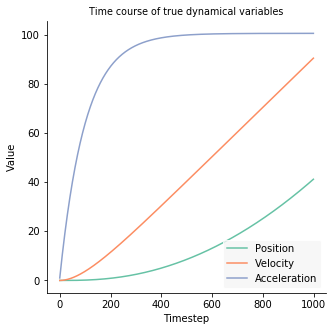

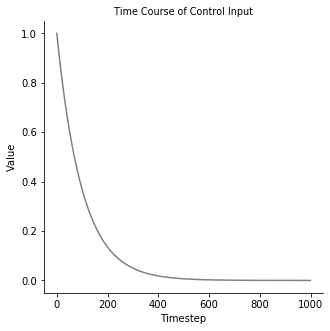

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


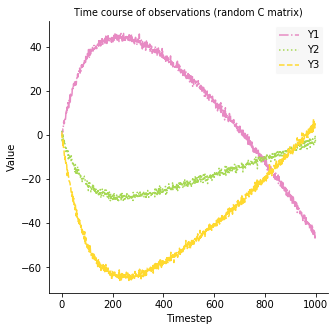

In [46]:
#Initial basic tracking behaviour.
!pip install brewer2mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import scipy.linalg as LA
import brewer2mpl
import seaborn as sns

bmap = brewer2mpl.get_map("Set2", 'qualitative',7)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5, 5],
   'font.family': 'sans-serif'
   }
mp.rcParams.update(params)


dt = 0.001
A = np.array([[1, dt, 0.5 * dt**2],
     [0,1,dt],
     [0,0,1]])
x = np.array([0,0,0])
#C = np.identity(3)
C = np.random.normal(0,1,[3,3])
print(C.shape)
print(np.dot(A,x))
def u_fun(t):
  return np.exp(-0.01 * t)

us = []
xs = []
ys = []
B = np.array([0,0,1])
xhat = np.array([0.0,0.0,0.0])
phat = np.identity(3)
Q = np.identity(3)
R = np.identity(3)
xhats = []
phats = []
xhat_grad = xhat
phat_grad = np.copy(phat)
xhat_grads = []
for i in range(1000):
  u = u_fun(i)
  x = np.dot(A,x) + np.dot(B,u) #+ np.random.normal(0,0.1,3)
  y = np.dot(C, x) + np.random.normal(0,1,3)
  xhat_proj = np.dot(A,xhat) + np.dot(B,u)
  phat_proj = np.dot(A, np.dot(phat, A.T)) + Q
  K = np.dot(np.dot(phat_proj, C.T), LA.inv(np.dot(np.dot(C,phat_proj),C.T) + R))
  xhat = xhat_proj + np.dot(K, y - np.dot(C,xhat_proj))
  phat = phat_proj - np.dot(K, np.dot(C, phat_proj))
  for i in range(5):
    ex = xhat_grad - (np.dot(A, xhat_grad) + np.dot(B,u))
    ey = y - np.dot(C, xhat_grad)
    dldmu = np.dot(phat_grad, ex) - np.dot(C.T, np.dot(R, ey))
    xhat_grad -= (0.05 * dldmu)

  xs.append(x)
  ys.append(y)
  us.append(u)
  xhats.append(np.copy(xhat))
  xhat_grads.append(np.copy(xhat_grad))
xs = np.array(xs)
xhats = np.array(xhats)
xhat_grads = np.array(xhat_grads)
us = np.array(us)
ys = np.array(ys)

def plot_graph(xs, xhats, xhat_grads, title):
  plt.plot(xs,label="True Value",color=colors[4])
  plt.plot(xhats, label="Kalman Filter",color=colors[2])
  plt.plot(xhat_grads, label="Gradient Method", linestyle='-.',color=colors[1])
  plt.title(title)
  leg = plt.legend()
  f = leg.get_frame()
  f.set_edgecolor('1')
  f.set_facecolor('0.96')
  plt.xticks(np.arange(0,1010,200))
  plt.xlabel('Timestep',fontsize=10)
  plt.ylabel("Predicted Value",fontsize=10)
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig(title + "_NKF.eps", format="eps")
  plt.show()

def plot_true_dynamics(xs, us,ys):
  plt.plot(xs[:,0], label="Position", color=colors[0])
  plt.plot(xs[:,1], label="Velocity", color=colors[1])
  plt.plot(xs[:,2], label="Acceleration", color=colors[2])
  plt.title("Time course of true dynamical variables")
  leg = plt.legend()
  f = leg.get_frame()
  f.set_edgecolor('1')
  f.set_facecolor('0.96')
  plt.xticks(np.arange(0,1010,200))
  plt.xlabel('Timestep',fontsize=10)
  plt.ylabel("Value",fontsize=10)
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig("True_dynamics.eps", format="eps")
  plt.show()

  plt.plot(us, label="Control Input", color="gray")
  plt.title("Time Course of Control Input")
  plt.xlabel('Timestep',fontsize=10)
  plt.ylabel("Value",fontsize=10)
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig("Control_Input.eps", format="eps")
  plt.show()

  plt.plot(ys[:,0], label="Y1",linestyle="-.", color=colors[3])
  plt.plot(ys[:,1], label="Y2",linestyle=":", color=colors[4])
  plt.plot(ys[:,2], label="Y3",linestyle="--", color=colors[5])
  plt.title("Time course of observations (random C matrix)")
  leg = plt.legend()
  f = leg.get_frame()
  f.set_edgecolor('1')
  f.set_facecolor('0.96')
  plt.xticks(np.arange(0,1010,200))
  plt.xlabel('Timestep',fontsize=10)
  plt.ylabel("Value",fontsize=10)
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig("Random_observations.eps", format="eps")
  plt.show()

#plot_graph(xs[:,0], xhats[:,0], xhat_grads[:,0], "Estimated Position")
#plot_graph(xs[:,1], xhats[:,1], xhat_grads[:,1], "Estimated Velocity")
#plot_graph(xs[:,2], xhats[:,2], xhat_grads[:,2], "Estimated Acceleration")

plot_true_dynamics(xs,us,ys)


(3, 3)
[0. 0. 0.]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


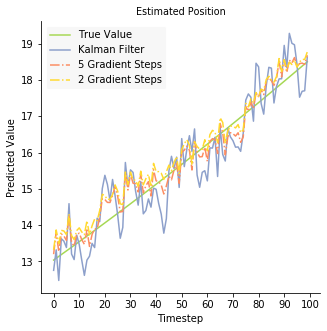

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


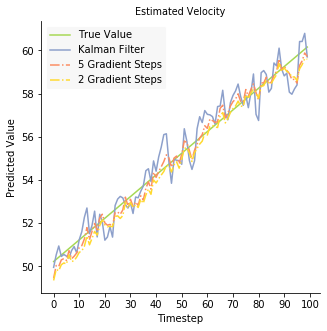

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


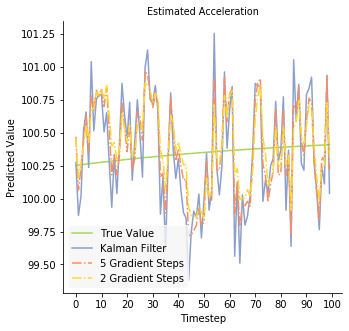

In [39]:
#A closer look at the tracking and the effect of fewer gradient steps



dt = 0.001
A = np.array([[1, dt, 0.5 * dt**2],
     [0,1,dt],
     [0,0,1]])
x = np.array([0,0,0])
#C = np.identity(3)
C = np.random.normal(0,1,[3,3])
print(C.shape)
print(np.dot(A,x))
def u_fun(t):
  return np.exp(-0.01 * t)

us = []
xs = []
ys = []
B = np.array([0,0,1])
xhat = np.array([0.0,0.0,0.0])
phat = np.identity(3)
Q = np.identity(3)
R = np.identity(3)
xhats = []
phats = []
xhat_grad = xhat
phat_grad = np.copy(phat)
xhat_grads = []
xhat_grad2 = np.copy(xhat_grad)
xhat_grads2 = []
for i in range(1000):
  u = u_fun(i)
  x = np.dot(A,x) + np.dot(B,u) #+ np.random.normal(0,0.1,3)
  y = np.dot(C, x) + np.random.normal(0,1,3)
  xhat_proj = np.dot(A,xhat) + np.dot(B,u)
  phat_proj = np.dot(A, np.dot(phat, A.T)) + Q
  K = np.dot(np.dot(phat_proj, C.T), LA.inv(np.dot(np.dot(C,phat_proj),C.T) + R))
  xhat = xhat_proj + np.dot(K, y - np.dot(C,xhat_proj))
  phat = phat_proj - np.dot(K, np.dot(C, phat_proj))
  for i in range(5):
    ex = xhat_grad - (np.dot(A, xhat_grad) + np.dot(B,u))
    ey = y - np.dot(C, xhat_grad)
    dldmu = np.dot(phat_grad, ex) - np.dot(C.T, np.dot(R, ey))
    xhat_grad -= (0.05 * dldmu)

  for i in range(2):
    ex2 = xhat_grad2 - (np.dot(A, xhat_grad2) + np.dot(B,u))
    ey2 = y - np.dot(C, xhat_grad2)
    dldmu2 = np.dot(phat_grad, ex2) - np.dot(C.T, np.dot(R, ey2))
    xhat_grad2 -= (0.07 * dldmu2)

  xs.append(np.copy(x))
  ys.append(y)
  xhats.append(np.copy(xhat))
  xhat_grads.append(np.copy(xhat_grad))
  xhat_grads2.append(np.copy(xhat_grad2))

xs = np.array(xs)
xhats = np.array(xhats)
xhat_grads = np.array(xhat_grads)
xhat_grads2 = np.array(xhat_grads2)

def plot_graph2(xs, xhats, xhat_grads,xhat_grads2, title):
  plt.plot(xs,label="True Value",color=colors[4])
  plt.plot(xhats, label="Kalman Filter",color=colors[2])
  plt.plot(xhat_grads, label="5 Gradient Steps", linestyle='-.',color=colors[1])
  plt.plot(xhat_grads2,label="2 Gradient Steps", linestyle='-.', color=colors[5])
  plt.title(title)
  leg = plt.legend()
  f = leg.get_frame()
  f.set_edgecolor('1')
  f.set_facecolor('0.96')
  plt.xticks(np.arange(0,101,10))
  plt.xlabel('Timestep',fontsize=10)
  plt.ylabel("Predicted Value",fontsize=10)
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig(title + "_NKF_zoomed.eps", format="eps")
  plt.show()



plot_graph2(xs[599:699,0], xhats[599:699,0], xhat_grads[599:699,0],xhat_grads2[599:699,0], "Estimated Position")
plot_graph2(xs[599:699,1], xhats[599:699,1], xhat_grads[599:699,1],xhat_grads2[599:699,1], "Estimated Velocity")
plot_graph2(xs[599:699,2], xhats[599:699,2], xhat_grads[599:699,2],xhat_grads2[599:699,2], "Estimated Acceleration")

In [41]:
!ls
from google.colab import files
files.download("Estimated Acceleration_NKF.eps")
files.download("Estimated Velocity_NKF.eps")
files.download("Estimated Position_NKF.eps")
files.download("Estimated Acceleration_NKF_zoomed.eps")
files.download("Estimated Velocity_NKF_zoomed.eps")
files.download("Estimated Position_NKF_zoomed.eps")

'Estimated Acceleration_C_matrix.eps'	 'Estimated Position_NKF_zoomed.eps'
'Estimated Acceleration_NKF.eps'	 'Estimated Velocity_C_matrix.eps'
'Estimated Acceleration_NKF_zoomed.eps'  'Estimated Velocity_NKF.eps'
'Estimated Position_C_matrix.eps'	 'Estimated Velocity_NKF_zoomed.eps'
'Estimated Position_NKF.eps'		  sample_data


In [48]:
!ls
from google.colab import files
files.download("Random_observations.eps")
files.download("True_dynamics.eps")
files.download("Control_Input.eps")

 Control_Input.eps			 'Estimated Velocity_C_matrix.eps'
'Estimated Acceleration_C_matrix.eps'	 'Estimated Velocity_NKF.eps'
'Estimated Acceleration_NKF.eps'	 'Estimated Velocity_NKF_zoomed.eps'
'Estimated Acceleration_NKF_zoomed.eps'   Random_observations.eps
'Estimated Position_C_matrix.eps'	  sample_data
'Estimated Position_NKF.eps'		  True_dynamics.eps
'Estimated Position_NKF_zoomed.eps'
